In [1]:
from sklearn import datasets

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:
iris = datasets.load_iris()

In [5]:
from playML.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, seed = 1)

## 数据归一化

In [7]:
from playML.preprocessing import StandarScaler

In [8]:
my_sc = StandarScaler()

In [9]:
my_sc.fit(X_train)

In [10]:
X_train_from_train = my_sc.transform(X_train)
X_test_from_train = my_sc.transform(X_test)

In [11]:
my_sc.fit(X_test)

In [12]:
X_train_from_test = my_sc.transform(X_train)
X_test_from_test = my_sc.transform(X_test)

In [33]:
np.sum(X_train_from_train == X_train_from_test)

0

In [36]:
np.sum(np.array([[1,2],[3,4]]) == np.array([[1,2],[3,4]]))

4

# KNN算法

In [14]:
from playML.KNN import KNNClassifier

In [15]:
my_knnclf = KNNClassifier(k = 3)

In [16]:
my_knnclf.fit(X_train, y_train)

KNN(k=3)

In [17]:
my_knnclf.predict(X_test)

array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 1, 0, 0, 1, 2])

In [18]:
my_knnclf.score(X_test, y_test)

1.0

In [19]:
from playML.metrics import accuracy_score as my_accuracy_score
from playML.metrics import root_mean_squared_error as my_root_mean_squared_error

In [20]:
my_accuracy_score(y_test, my_knnclf.predict(X_test))

1.0

In [21]:
my_root_mean_squared_error(y_test, my_knnclf.predict(X_test))

0.0

## 对归一化之后的X_train进行KNN分类

In [22]:
my_knnclf.fit(X_train_from_train, y_train)

KNN(k=3)

In [23]:
my_accuracy_score(y_test, my_knnclf.predict(X_test_from_train))

1.0

In [24]:
my_knnclf.fit(X_train_from_test, y_train)

KNN(k=3)

In [25]:
my_accuracy_score(y_test, my_knnclf.predict(X_test_from_test))

1.0

# SimpleLinearRegression算法

In [26]:
from playML.SimpleLinearRegression import SimpleLinearRegression

In [27]:
X_train_slr = X_train[:,0]
X_test_slr = X_test[:,0]

In [28]:
my_slrclf = SimpleLinearRegression()

In [29]:
my_slrclf.fit(X_train_slr, y_train)

SimpleLinearRegresson2()

In [30]:
my_accuracy_score(X_test_slr, my_slrclf.predict(X_test_slr))

0.0

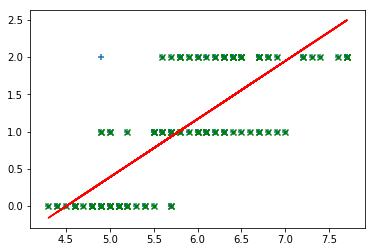

In [32]:
plt.scatter(X_train_slr, y_train, marker = '+')
plt.plot(X_train_slr, my_slrclf.predict(X_train_slr), color = 'r')
plt.scatter(X_train_slr, my_knnclf.predict(X_train_from_test), color = 'g', marker = 'x')
plt.show()